In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



In [3]:
df= pd.read_csv('bank.csv', sep= ',' , encoding= ' utf-8')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
columns = ['age', 'job', 'education', 'housing','loan','day','month',
           'campaign', 'previous']

In [8]:
df = df[columns]
df.head()

,age,job,education,housing,loan,day,month,campaign,previous
0,58,management,tertiary,yes,no,5,may,1,0
1,44,technician,secondary,yes,no,5,may,1,0
2,33,entrepreneur,secondary,yes,yes,5,may,1,0
3,47,blue-collar,unknown,yes,no,5,may,1,0
4,33,unknown,unknown,no,no,5,may,1,0


In [9]:
from sklearn.preprocessing import LabelEncoder


In [10]:
j_le = LabelEncoder()
e_le = LabelEncoder()
h_le = LabelEncoder ()
l_le = LabelEncoder()
m_le = LabelEncoder()


In [11]:
df['job'] = j_le.fit_transform(df['job'])
df['education'] =e_le.fit_transform(df['education'])
df['housing'] = h_le.fit_transform(df['housing'])
df['loan'] = l_le.fit_transform(df['loan'])
df['month'] = m_le.fit_transform(df['month'])

In [12]:
df.head()

,age,job,education,housing,loan,day,month,campaign,previous
0,58,4,2,1,0,5,8,1,0
1,44,9,1,1,0,5,8,1,0
2,33,2,1,1,1,5,8,1,0
3,47,1,3,1,0,5,8,1,0
4,33,11,3,0,0,5,8,1,0


In [13]:
abs(df.corr())

,age,job,education,housing,loan,day,month,campaign,previous
age,1.000000,0.021868,0.106807,0.185513,0.015655,0.009120,0.042357,0.004760,0.001288
job,0.021868,1.000000,0.166707,0.125363,0.033004,0.022856,0.092870,0.006839,0.000911
education,0.106807,0.166707,1.000000,0.090790,0.048574,0.022671,0.057304,0.006255,0.017570
housing,0.185513,0.125363,0.090790,1.000000,0.041323,0.027982,0.271481,0.023599,0.037076
loan,0.015655,0.033004,0.048574,0.041323,1.000000,0.011370,0.022145,0.009980,0.011043
day,0.009120,0.022856,0.022671,0.027982,0.011370,1.000000,0.006028,0.162490,0.051710
month,0.042357,0.092870,0.057304,0.271481,0.022145,0.006028,1.000000,0.110031,0.022727
campaign,0.004760,0.006839,0.006255,0.023599,0.009980,0.162490,0.110031,1.000000,0.032855
previous,0.001288,0.000911,0.017570,0.037076,0.011043,0.051710,0.022727,0.032855,1.000000


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop('campaign' , axis= 1).values 
Y = df['campaign'].values

In [16]:
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size= 0.20, random_state =30)


In [20]:
x_train.shape

(36168, 8)

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier ( max_depth=7, max_features=6)

In [22]:
dt=DecisionTreeClassifier ( max_depth=7, max_features=6)

In [20]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, max_features=6)

In [21]:
dt.score(x_train,y_train)

0.4348871930988719

In [22]:
dt.score(x_test,y_test)

0.428176490102842

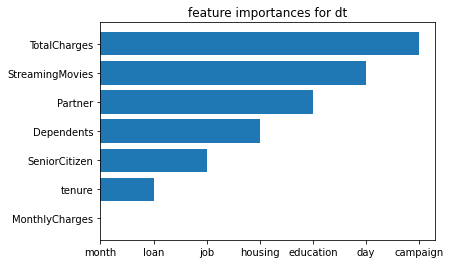

In [26]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for dt')
    plt.show()

columns = ['age', 'job', 'education', 'housing','loan','day','month',
           'campaign', 'previous']
    
dt= DecisionTreeClassifier (max_depth=7, max_features=6)
dt.fit(x_train,y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(df.columns, features_names, top=7)


In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(max_depth=5, max_features=6)

In [29]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features=6)

In [30]:
rf.score(x_train,y_train)

0.42355120548551206

In [31]:
rf.score(x_test,y_test)


0.42076744443215747

In [32]:
z=rf.predict(x_test)
z

array([1, 2, 1, ..., 2, 1, 1], dtype=int64)

In [33]:
y_test.shape

(9043,)

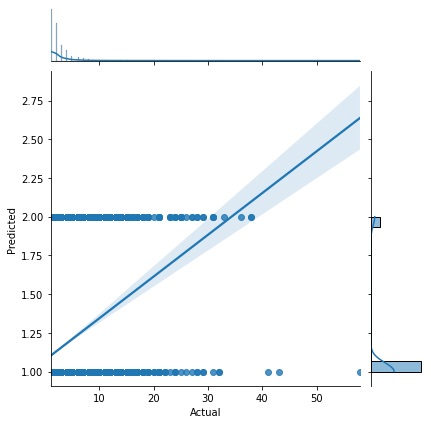

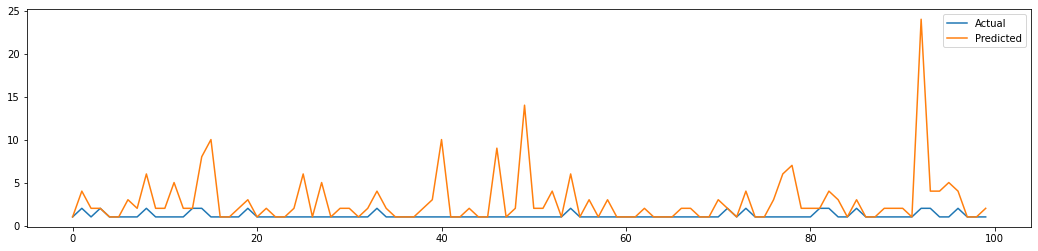

In [34]:
z=rf.predict(x_test)

test = pd.DataFrame({'Predicted':z,'Actual':y_test})
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',)
fig= plt.figure(figsize=(18,4))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])


In [35]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install --upgrade xgboost

Requirement already up-to-date: xgboost in o:\anaconda\lib\site-packages (1.4.2)
Note: you may need to restart the kernel to use updated packages.


In [39]:
from xgboost import XGBClassifier

In [40]:
xgb = XGBClassifier(objective= 'binary:logistic', learning_rate=0.3, max_depth=3)

In [41]:
xgb.fit(x_train,y_train)

O:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:03:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
xgb.score(x_train,y_train)

0.43751382437513825

In [43]:
xgb.score(x_test,y_test)

0.428176490102842

In [44]:
xgb.score(x_train,y_train)

0.43751382437513825

In [47]:
xgb.score(x_test,y_test)

0.428176490102842

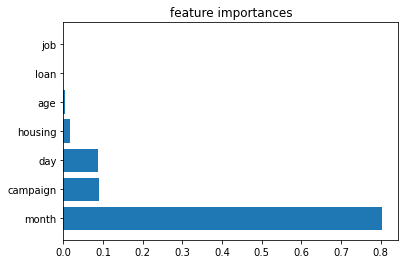

In [67]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names  = ['age', 'job', 'education', 'housing','loan','day','month',
           'campaign', 'previous']
    
    
rf =RandomForestClassifier(n_estimators=4 , max_depth=3 , min_samples_split=25 , max_features=4)
rf.fit(x_train,y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(rf.feature_importances_), features_names, top=7)


In [50]:
df = df[columns]
df.head()

,age,job,education,housing,loan,day,month,campaign,previous
0,58,4,2,1,0,5,8,1,0
1,44,9,1,1,0,5,8,1,0
2,33,2,1,1,1,5,8,1,0
3,47,1,3,1,0,5,8,1,0
4,33,11,3,0,0,5,8,1,0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = df.drop('previous' , axis= 1).values 
Y = df['previous'].values

In [53]:
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size= 0.20, random_state =30)

In [54]:
x_train.shape

(36168, 8)

In [60]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install --upgrade xgboost

Requirement already up-to-date: xgboost in o:\anaconda\lib\site-packages (1.4.2)
Note: you may need to restart the kernel to use updated packages.


In [62]:
from xgboost import XGBClassifier


In [63]:
xgb= XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42,
                   max_depth=6, learning_rate=0.3)
                              
xgb.fit(x_train, y_train)

O:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
xgb.score(x_train,y_train)

0.8189559831895599

In [65]:
xgb.score(x_test,y_test)

0.8167643481145638

In [66]:
#Prediction
y_pred = xgb.predict_proba(x_test)

O:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:15:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


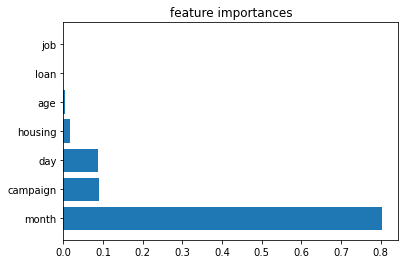

In [68]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['age', 'job', 'education', 'housing','loan','day','month',
           'campaign', 'previous']
    
xgb =XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42)
xgb.fit(x_train,y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(rf.feature_importances_), features_names, top=7)


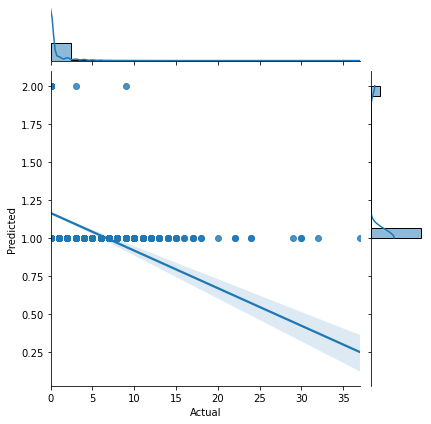

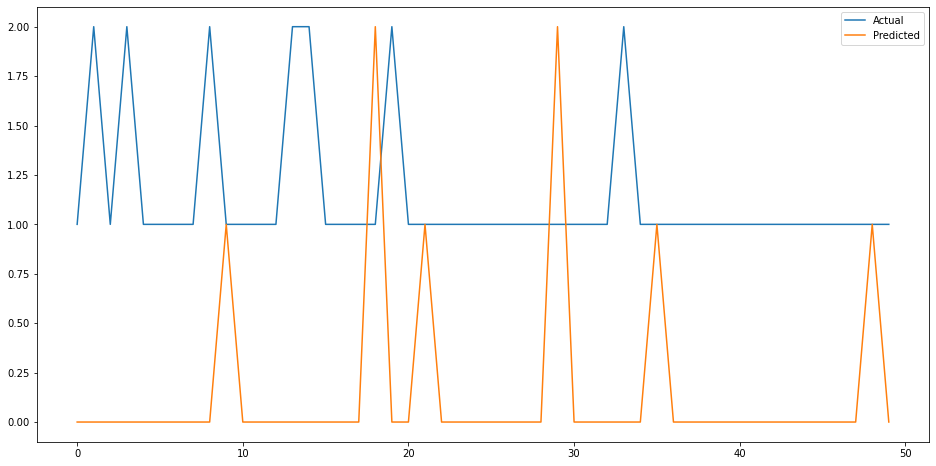

In [69]:
test = pd.DataFrame({'Predicted':z,'Actual':y_test})
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',)
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])


In [71]:
pip install ada-boost

Note: you may need to restart the kernel to use updated packages.


In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [74]:
abc = AdaBoostClassifier(n_estimators=7, learning_rate=0.6)



In [75]:
abc.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.6, n_estimators=7)

In [76]:
abc.score(x_train,y_train)

0.8171864631718646

In [77]:
abc.score(x_test,y_test)

0.8180913413690147

In [78]:
pip install voting

Note: you may need to restart the kernel to use updated packages.


In [79]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [80]:
LR = LogisticRegression(multi_class='multinomial', random_state=1)
RF = RandomForestClassifier(n_estimators=50, random_state=1)


In [81]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier ( max_depth=4, max_features=6)

In [82]:
VC = VotingClassifier(estimators=[('RF',RF),('dt',dt)],voting='hard')             # voting = 'hard'.


In [83]:
VC.fit(x_train, y_train)


VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=4,
                                                     max_features=6))])

In [84]:
VC.score(x_train,y_train)

0.8172417606724176

In [85]:
VC.score(x_test,y_test)

0.8179807585978105